2023-05-26 21:45:40.550820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.824e-01|  4.528e-01|          118707|     5.440e-01|     3.633e-01|              95229|   5.497e-01|   3.669e-01|            96171|      1.925e+03|
|--------------------------------------------------------------------------------------------------------------------------------------------

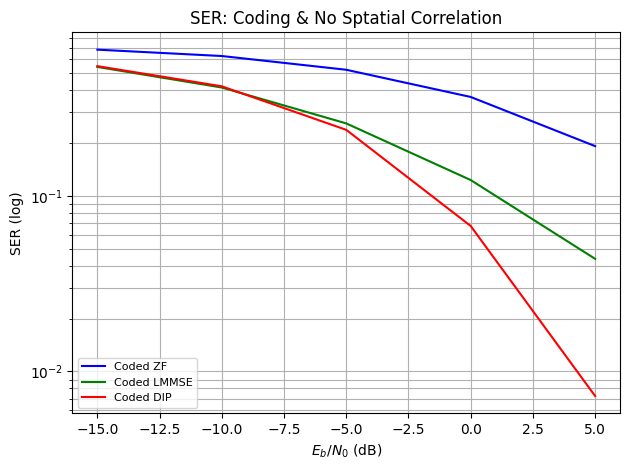

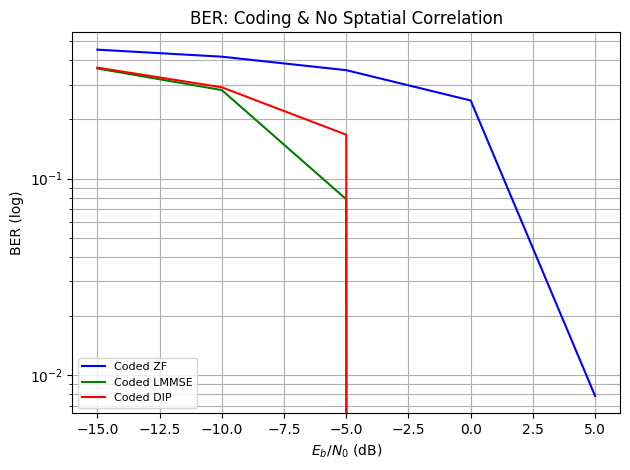

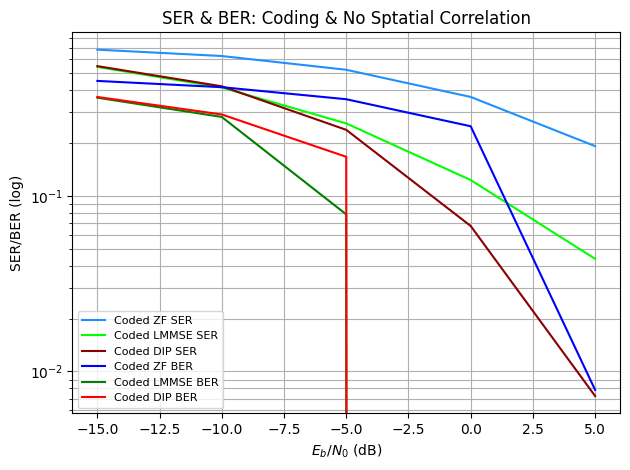

Loading BokehJS ...

(array([-15., -10.,  -5.,   0.,   5.]),
 array([0.68243027, 0.62770462, 0.52415848, 0.36683655, 0.1924324 ]),
 array([0.54397202, 0.41517639, 0.25929642, 0.1233139 , 0.04384995]),
 array([0.54972076, 0.42182922, 0.23829651, 0.06749344, 0.00724792]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from YCodeNCorr import ycodencorr

### Simulation
Block_Length = 1024        # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas
CODERATE = 0.5             # Code Rate

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 1024          # Number of Parallelly Processed Batches
EBN0_DB_MIN = -15.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0          # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5        # EBNO Points

model_ycodencorr = ycodencorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CODERATE)

model_ycodencorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)